# Training Plots for Various Models

In [1]:
import os

import e2cnn

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
import PIL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import configparser as ConfigParser

import utils
# Ipmport various network architectures
from networks import AGRadGalNet, DNSteerableLeNet, DNSteerableAGRadGalNet #e2cnn module only works in python3.7+
# Import various data classes
from datasets import FRDEEPF
from datasets import MiraBest_full, MBFRConfident, MBFRUncertain, MBHybrid
from datasets import MingoLoTSS, MLFR, MLFRTest

from sklearn.metrics import classification_report, roc_curve, auc

## Attempt at making a simpler seaborn plot:
Seemingly no easy way to make error bars without groupby.

## Full Training Plot of Each Model in Turn

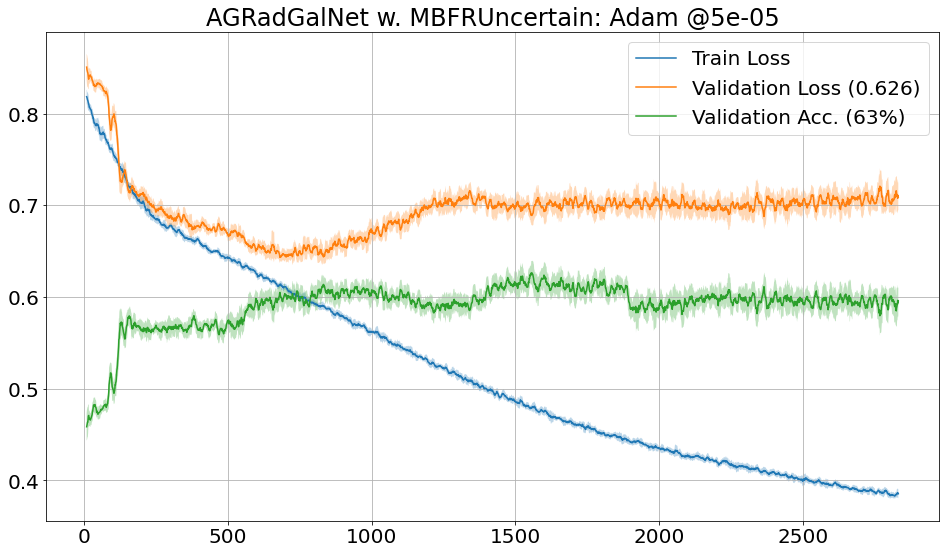

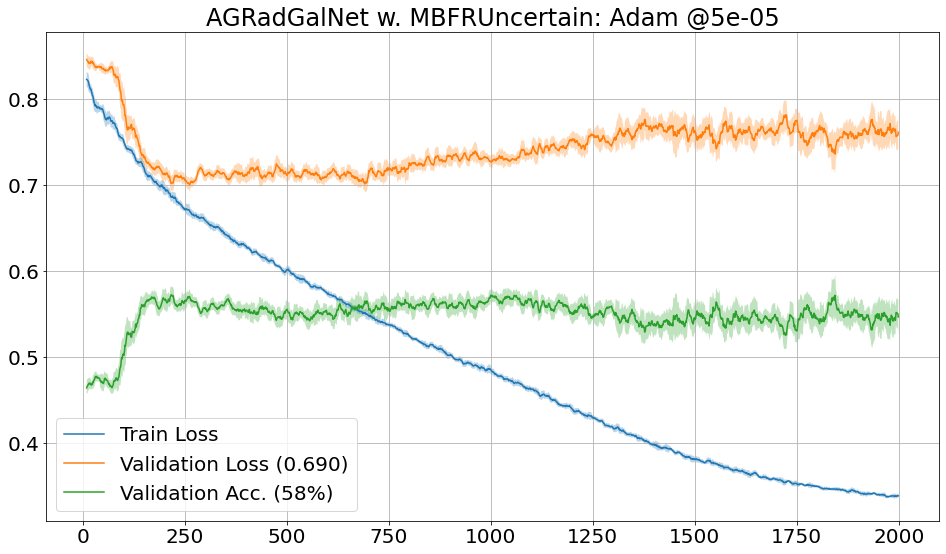

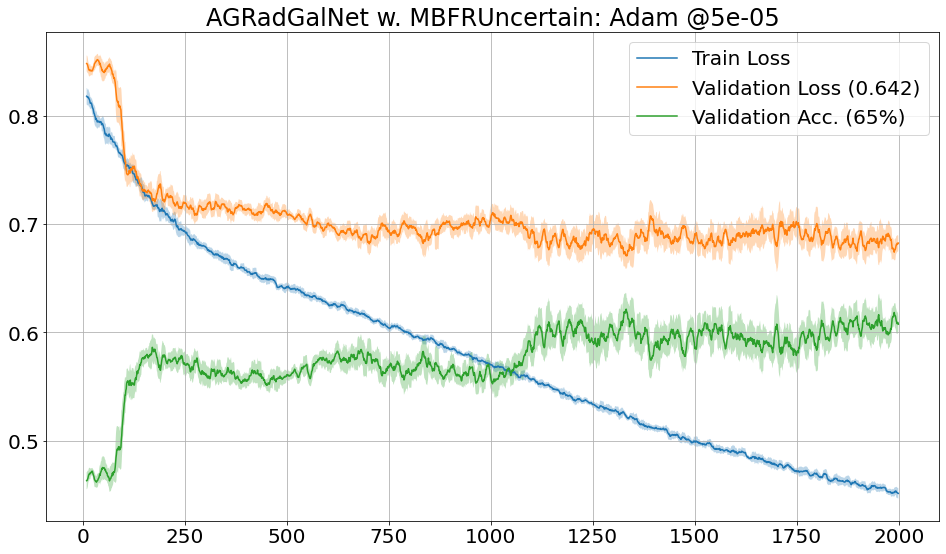

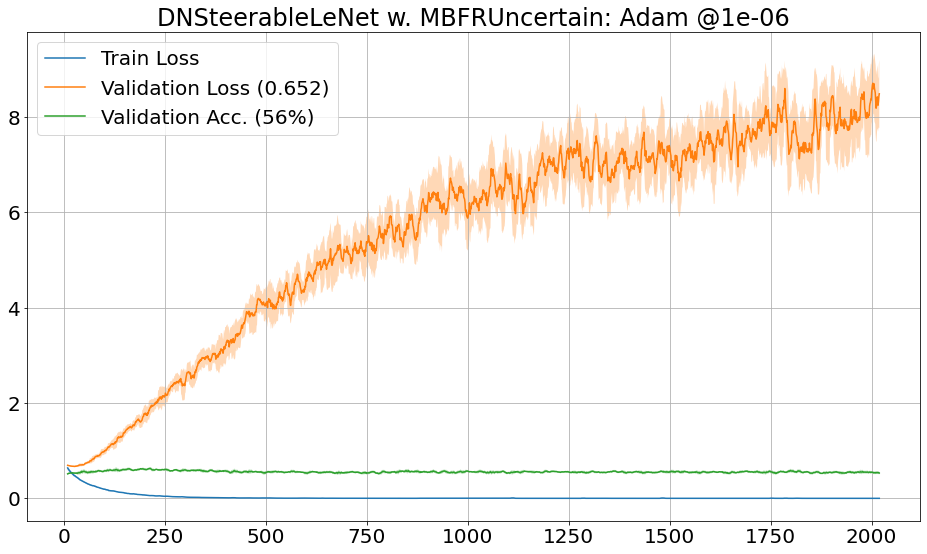

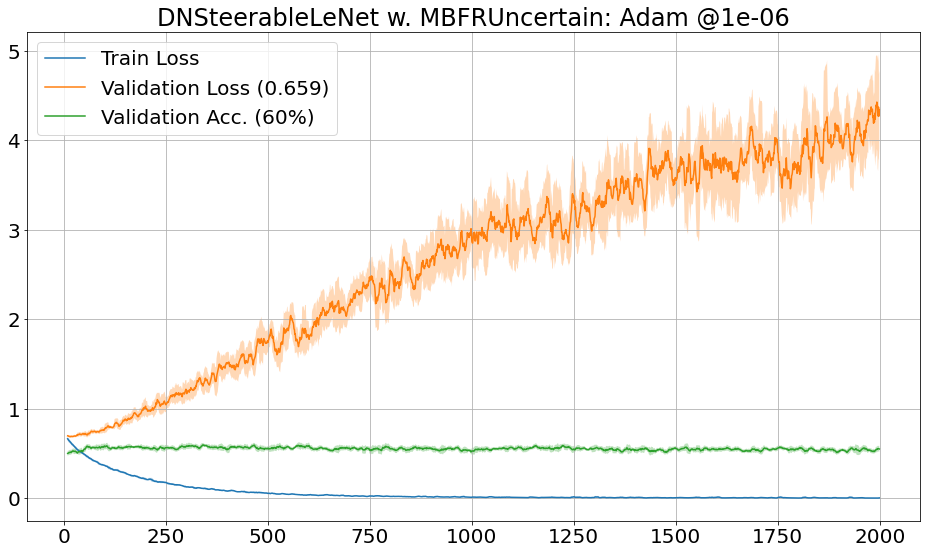

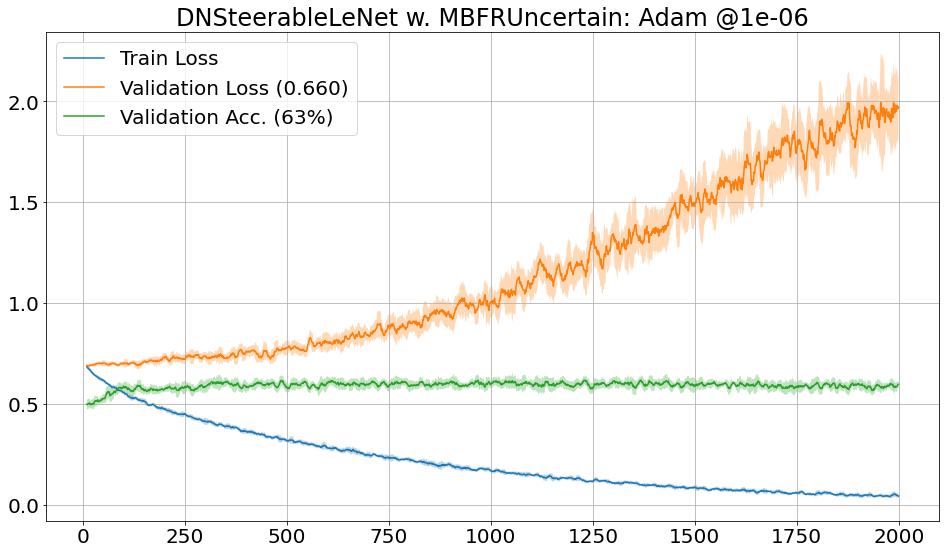

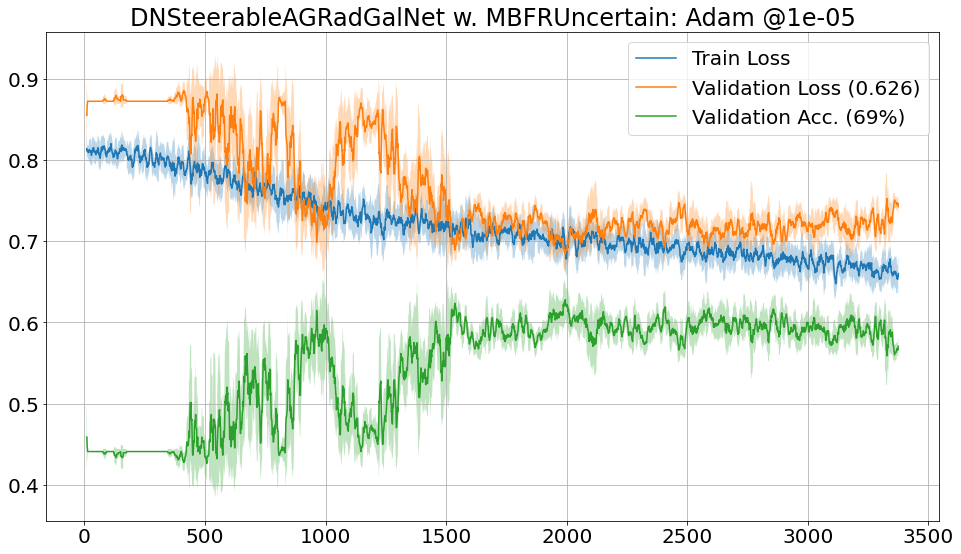

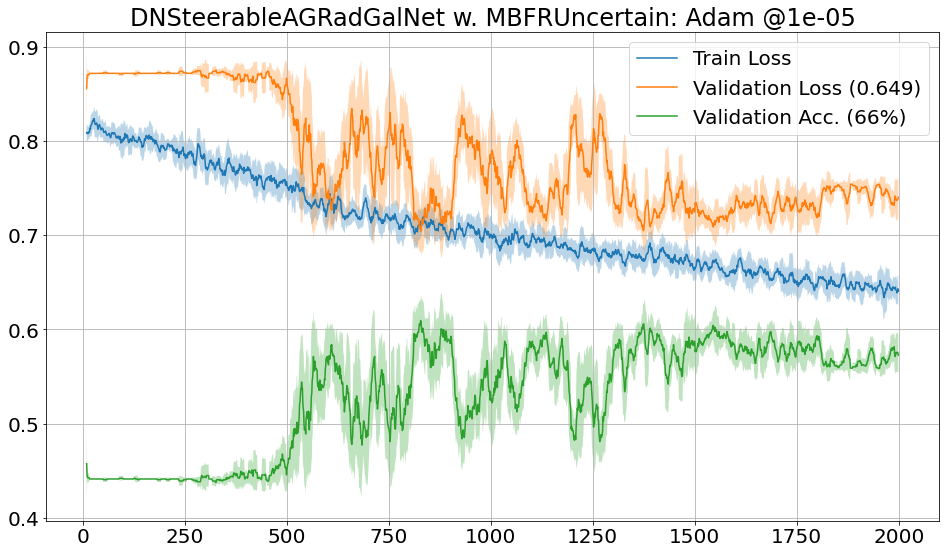

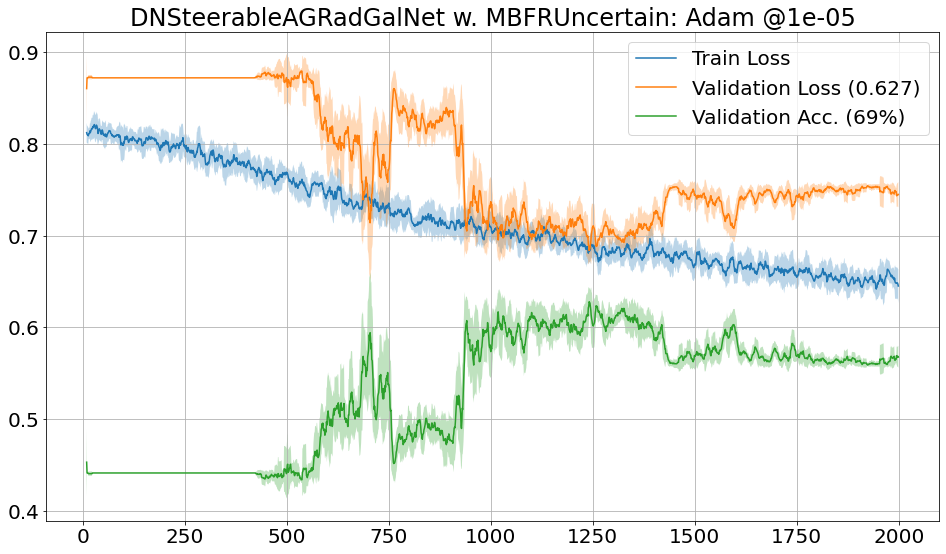

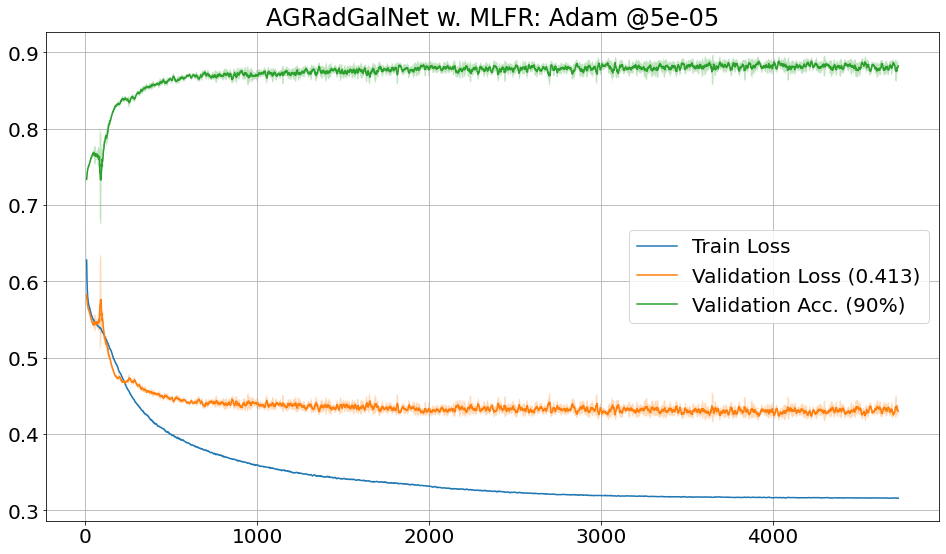

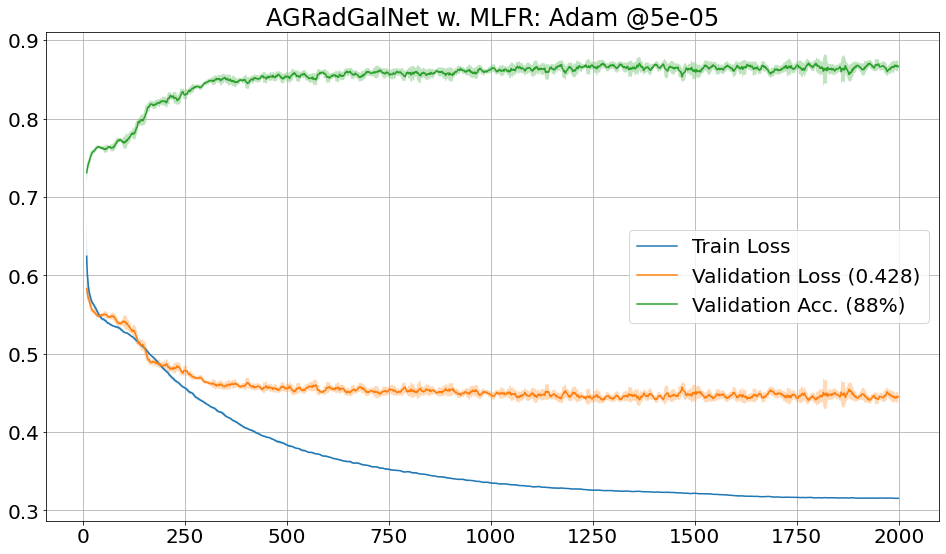

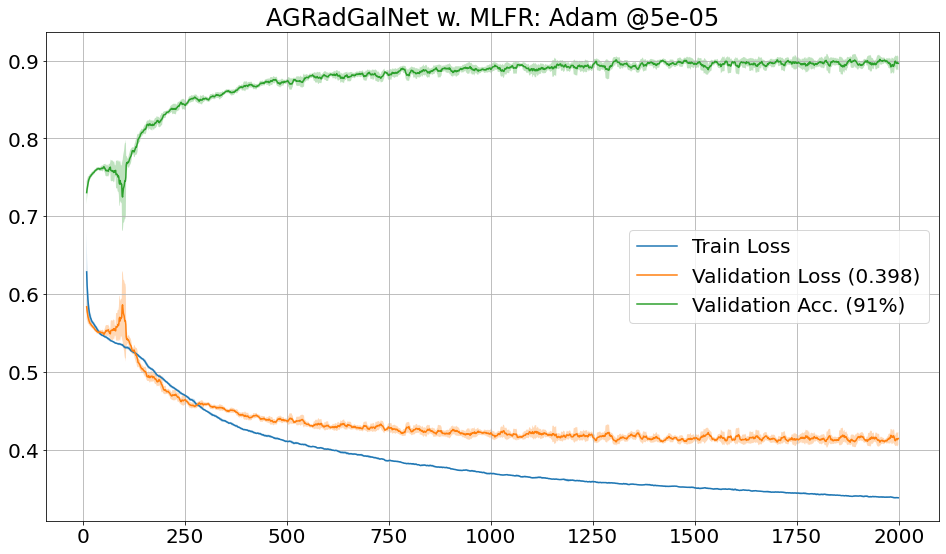

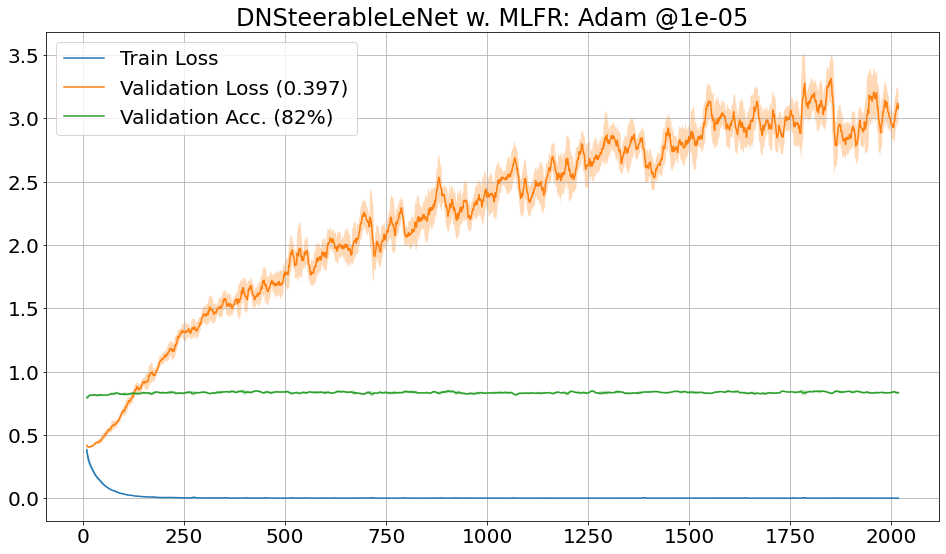

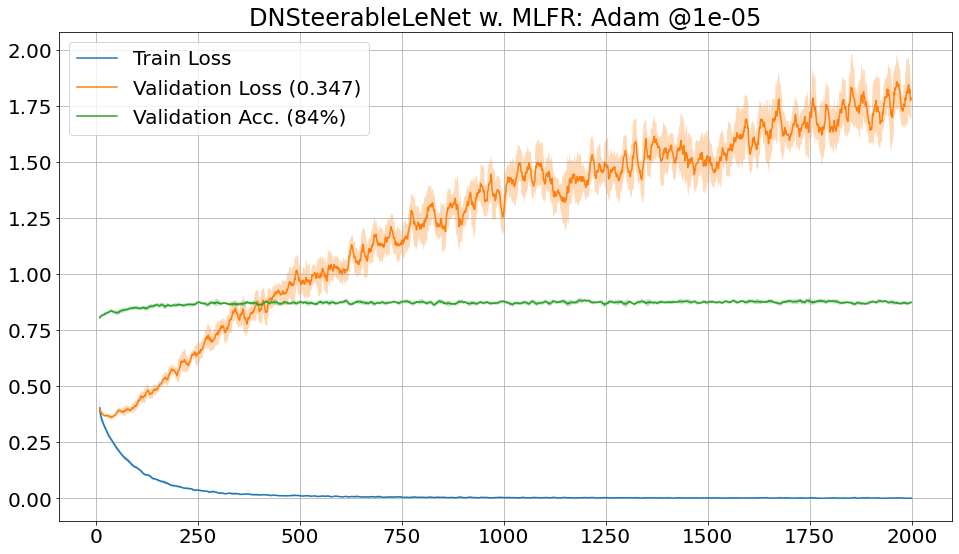

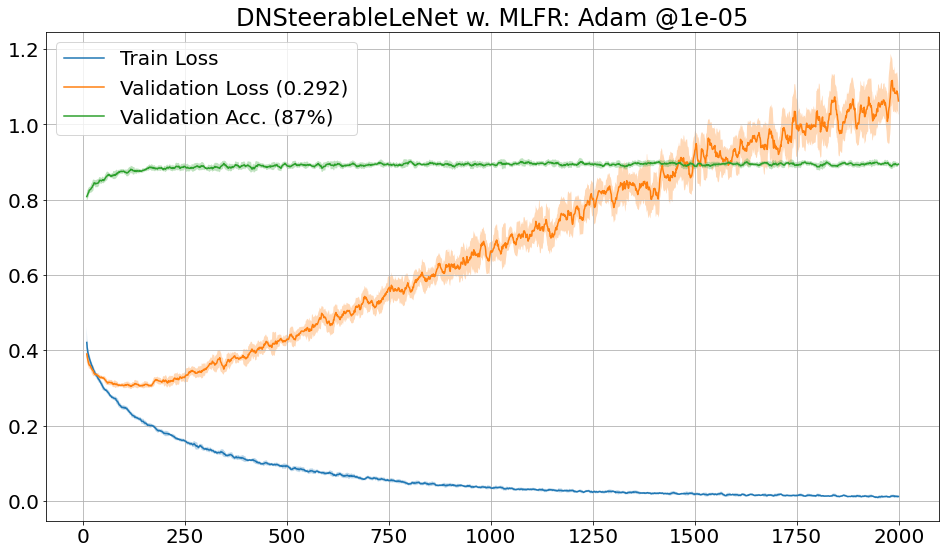

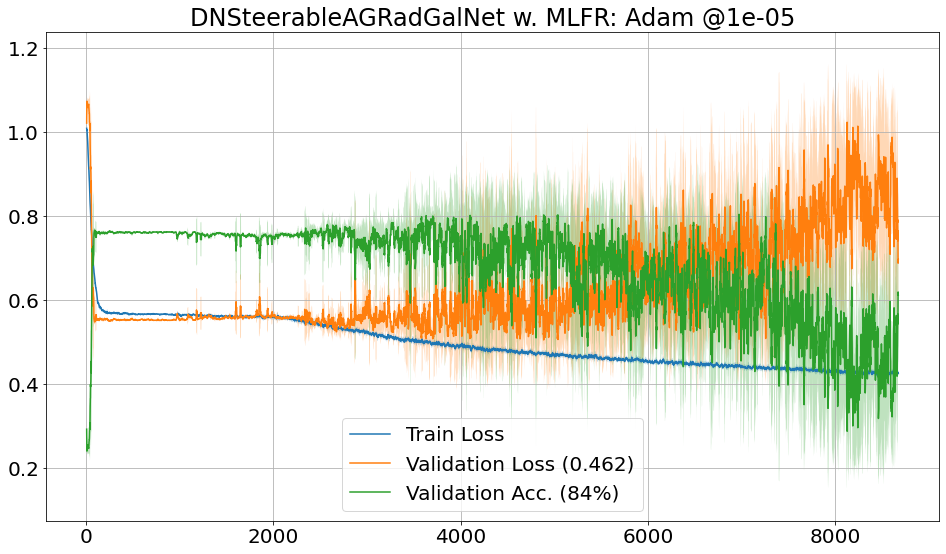

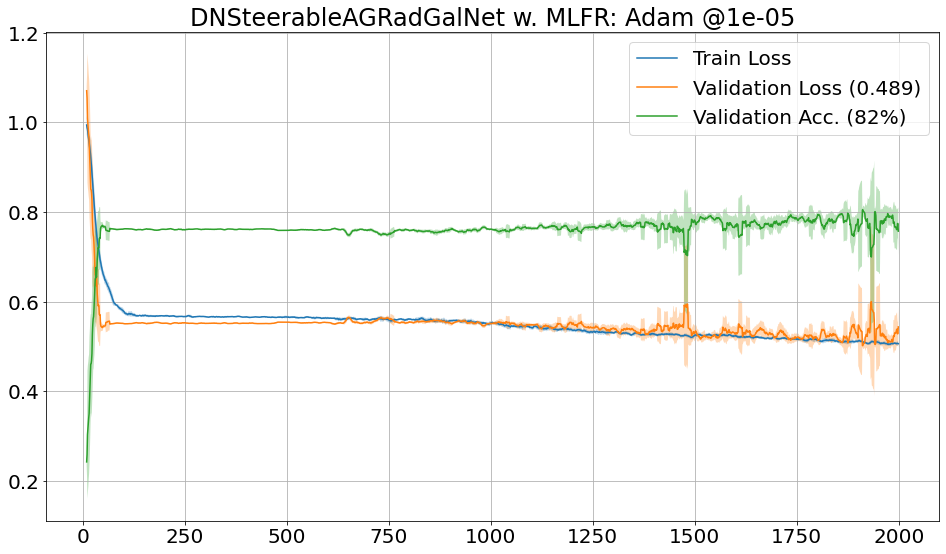

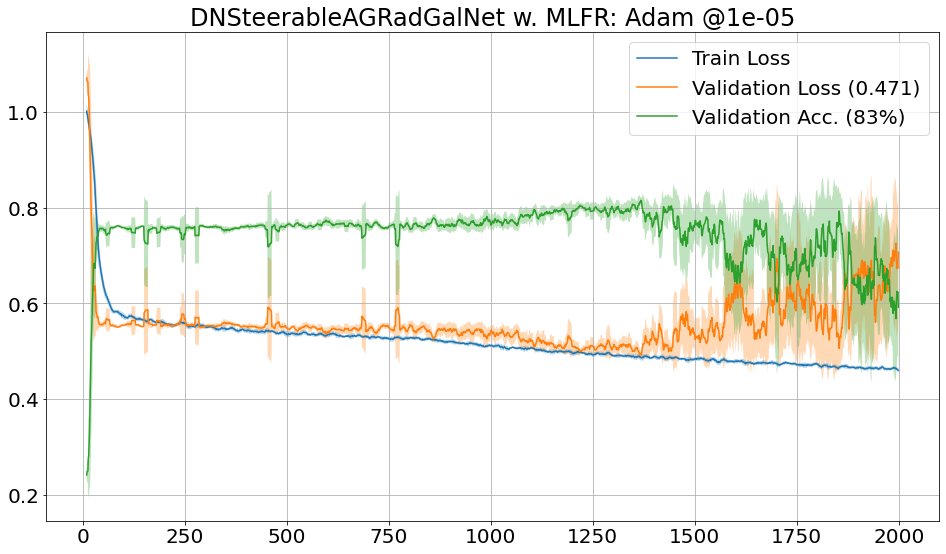

In [3]:
ylim = [0,1]
ylim = None
window_size=10

config_names = [
    "bowles2021mirabest.cfg",
    "bowles2021mirabest-RestrictedAug.cfg",
    "bowles2021mirabest-RandAug.cfg",
    
    "scaife2021mirabest.cfg",
    "scaife2021mirabest-RestrictedAug.cfg",
    "scaife2021mirabest-RandAug.cfg",
    
    "e2attentionmirabest.cfg",
    "e2attentionmirabest-RestrictedAug.cfg",
    "e2attentionmirabest-RandAug.cfg",
    
    "bowles2021mingo.cfg",
    "bowles2021mingo-RestrictedAug.cfg",
    "bowles2021mingo-RandAug.cfg",

    "scaife2021mingo.cfg", 
    "scaife2021mingo-RestrictedAug.cfg",
    "scaife2021mingo-RandAug.cfg",

    "e2attentionmingo.cfg",
    "e2attentionmingo-RestrictedAug.cfg",
    "e2attentionmingo-RandAug.cfg"
]

for config_name_ in config_names:
    config_name = "configs/"+config_name_
    
    config = ConfigParser.ConfigParser(allow_no_value=True)
    config.read(config_name)
    
    path_supliment = config['data']['augment']
    if path_supliment in ['True', 'False']:
        path_supliment=''
    else:
        path_supliment += '/'
    
    utils.evaluation.training_plot(
        config,
        ylim=ylim,
        plot=['training_loss', 'validation_loss', 'accuracy'],
        lr_modifier=1,
        path_supliment=path_supliment,
        mean=True,
        window_size=window_size
    )

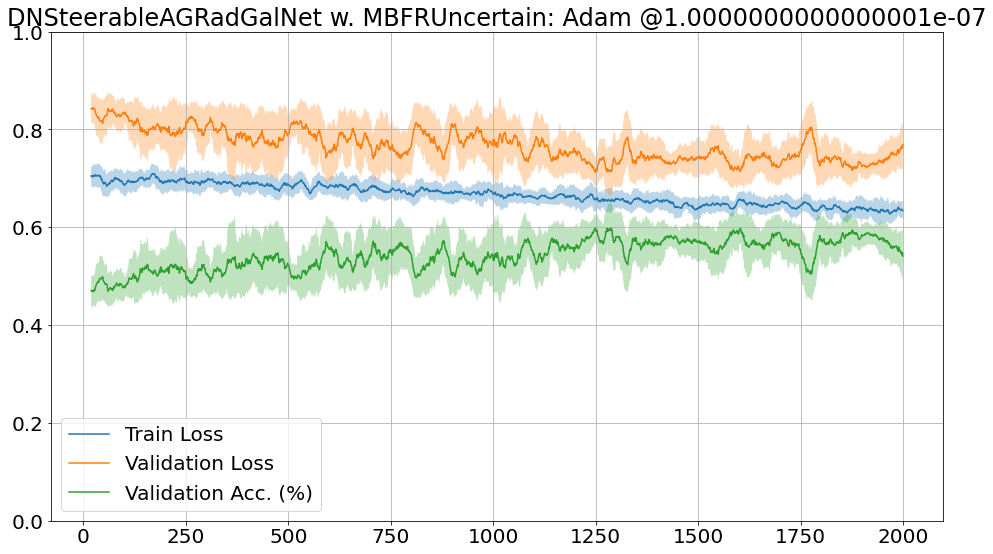

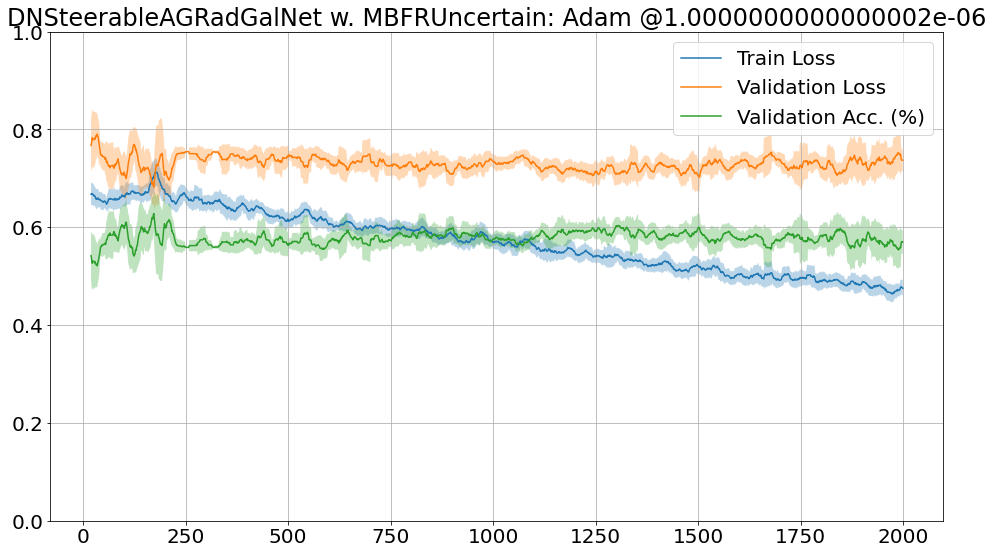

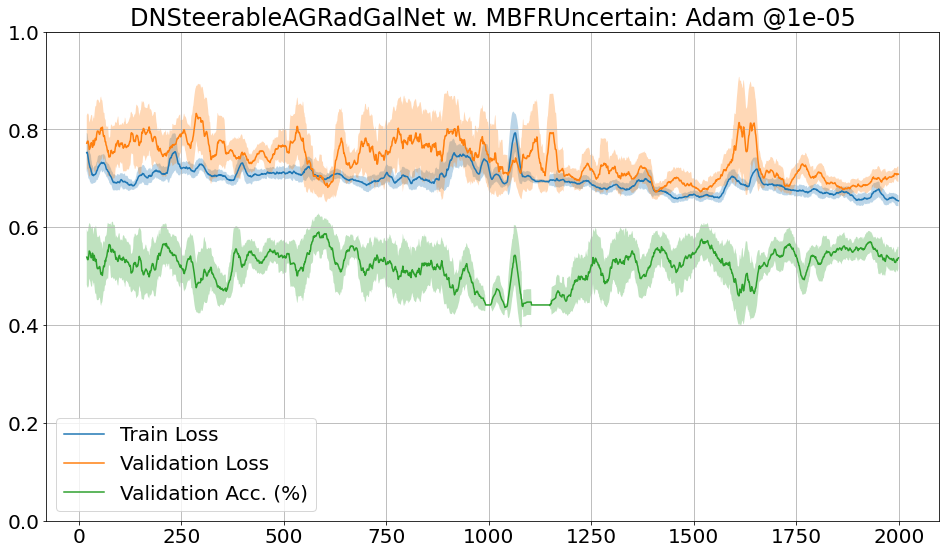

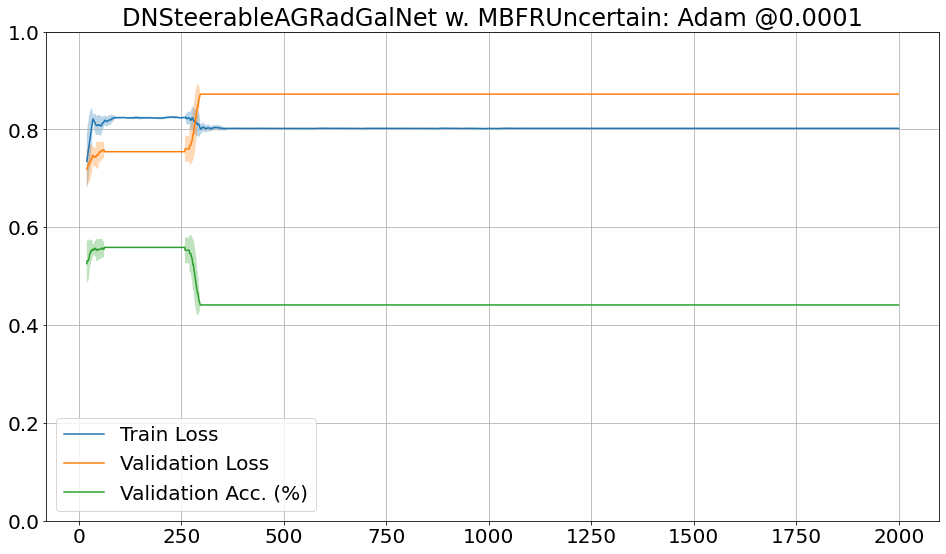

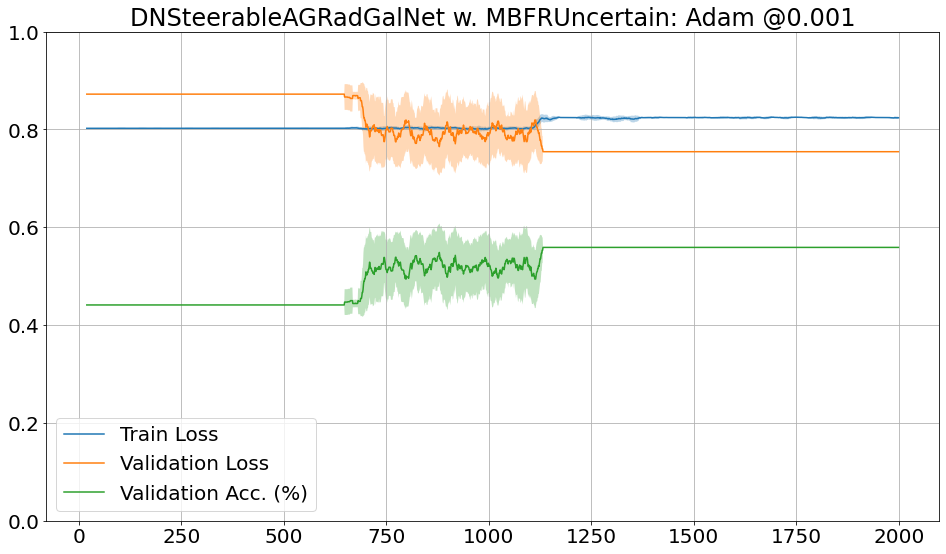

In [25]:
window_size = 20

utils.evaluation.training_plot(
    config, 
    ylim=[0,1],
    plot=['training_loss', 'validation_loss', 'accuracy'], 
    lr_modifier=0.01, 
    path_supliment="search_lr_1e-05/",
    mean=True,
    window_size=window_size
)

utils.evaluation.training_plot(
    config, 
    ylim=[0,1],
    plot=['training_loss', 'validation_loss', 'accuracy'], 
    lr_modifier=0.1, 
    path_supliment="search_lr_0.0001/",
    mean=True,
    window_size=window_size
)

utils.evaluation.training_plot(
    config, 
    ylim=[0,1],
    plot=['training_loss', 'validation_loss', 'accuracy'], 
    lr_modifier=1,
    path_supliment="search_lr_0.001/",
    mean=True,
    window_size=window_size
)

utils.evaluation.training_plot(
    config, 
    ylim=[0,1],
    plot=['training_loss', 'validation_loss', 'accuracy'], 
    lr_modifier=10,
    path_supliment="search_lr_0.01/",
    mean=True,
    window_size=window_size
)

utils.evaluation.training_plot(
    config, 
    ylim=[0,1],
    plot=['training_loss', 'validation_loss', 'accuracy'], 
    lr_modifier=100, 
    path_supliment="search_lr_0.1/",
    mean=True,
    window_size=window_size
)